<a href="https://colab.research.google.com/github/doaa450/Hybrid-Model/blob/main/41_ETEL_TI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict ETEL stock price using Technical Indicator

In [ ]:
import random as np
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(314)
np.seed(314)

In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 148489 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 270 kB 5.3 MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.21-cp37-cp37m-linux_x86_64.whl size=1444950 sha256=e05a80721053197ab9a6d25c99a0b6486bb539be4b3229e86cefb692e49bbf5e
  Stored in directory: /root/.cache/pip/wheels/32/3c/86/8dfaee7c11df54449f188172fcf66ae6d134f3118d0237df4a
Successfully built ta-lib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import datetime
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
sns.set(rc={'figure.figsize': [15, 20]}, font_scale=1.2)
from tensorflow import keras
from keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
!mkdir models
!rm -rf ./logs/

In [ ]:
from google.colab import drive 
!gdown --id '1s21qnolwOsHRWHSAjv6kz-k2W_9jcnSc'
# !unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=1s21qnolwOsHRWHSAjv6kz-k2W_9jcnSc
To: /content/ETEL Historical Data.csv
100% 100k/100k [00:00<00:00, 30.1MB/s]


In [ ]:
# Import data
df = pd.read_csv("/content/ETEL Historical Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1-Feb-12,14.96,15.06,15.06,14.60,729.42K,-0.13%
1,2-Feb-12,14.86,14.85,15.00,14.51,608.54K,-0.67%
2,6-Feb-12,14.73,14.51,14.88,14.51,1.19M,-0.87%
3,7-Feb-12,14.95,14.72,15.05,14.70,623.80K,1.49%
4,8-Feb-12,14.88,14.87,15.00,14.80,836.25K,-0.47%


In [ ]:
df['Vol.'] = (df['Vol.'].replace(r'[KM]+$', '', regex=True).astype(float) * \
         df['Vol.'].str.extract(r'[\d\.]+([KM]+)', expand=False)
        .fillna(1)
   .replace(['K','M'], [10**3, 10**6]).astype(int))

In [ ]:
df['Change %'] = df['Change %'].str.replace('%', '')

In [ ]:
df['datetime'] = pd.to_datetime(df['Date'])
df = df.set_index('datetime')
df.drop(['Date'], axis=1, inplace=True)
#df = df.sort_index(ascending=True)
df.head()

,Price,Open,High,Low,Vol.,Change %
datetime,,,,,,
2012-02-01,14.96,15.06,15.06,14.60,729420.0,-0.13
2012-02-02,14.86,14.85,15.00,14.51,608540.0,-0.67
2012-02-06,14.73,14.51,14.88,14.51,1190000.0,-0.87
2012-02-07,14.95,14.72,15.05,14.70,623800.0,1.49
2012-02-08,14.88,14.87,15.00,14.80,836250.0,-0.47


In [ ]:
df=df.astype("float32")

In [ ]:
df['Change %']=df['Change %'].apply(lambda x: x*10**-2)

In [ ]:
df = df.dropna()
dataset = df.values
dataset = dataset.astype("float32")

In [ ]:
import talib
from talib import abstract
from talib import abstract
from talib.abstract import *


## Creat Technical Indicators

# MACD - Moving Average Convergence/Divergence


In [ ]:
df['macd'], df['macdsignal'],df['macdhist']  = MACD(df['Price'], fastperiod=12, slowperiod=26, signalperiod=9)


##Momentum

In [ ]:
df['MOM'] = MOM(df['Price'], timeperiod=10)


## ROC

In [ ]:
df['ROC'] = ROC(df['Price'], timeperiod=10)


## RSI

In [ ]:
df['RSI'] = RSI(df['Price'], timeperiod=14)


## STOCASTIC

In [ ]:
df['slowk'],df['slowd'] = STOCH(df['High'], df['Low'], df['Price'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)


##BBANDS - Bollinger Bands


In [ ]:
df['upperband'], df['middleband'], df['lowerband'] = BBANDS(df['Price'], timeperiod=5, nbdevup=np.float64(2), nbdevdn=np.float64(2), matype=0)


##EMA - Exponential Moving Average


In [ ]:
df['EMA_30'] = EMA(df['Price'], timeperiod=30)


In [ ]:
df['EMA_10'] = EMA(df['Price'], timeperiod=10)


##MA - Moving average


In [ ]:
#df['MA_30'] = MA(df['Price'], timeperiod=30, matype=0)
#df['MA_10'] = MA(df['Price'], timeperiod=10, matype=0)


##SMA - Simple Moving Average


In [ ]:
df['SMA_30'] = SMA(df['Price'], timeperiod=30)
df['SMA_10'] = SMA(df['Price'], timeperiod=10)


##AVGPRICE - Average Price


In [ ]:
df['AVGPRICE'] = AVGPRICE(df['Open'], df['High'], df['Low'], df['Price'])


##Median Price

In [ ]:
df['Median'] = MEDPRICE(df['High'], df['Low'])


##Typical Price

In [ ]:
df['TYPPRICE'] = TYPPRICE(df['High'], df['Low'], df['Price'])


In [ ]:
df.head(35)

,Price,Open,High,Low,Vol.,Change %,macd,macdsignal,macdhist,MOM,ROC,RSI,slowk,slowd,upperband,middleband,lowerband,EMA_30,EMA_10,SMA_30,SMA_10,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2012-02-01,14.960000,15.06,15.060000,14.60,729420.0,-0.0013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.9200,14.830,14.873334
2012-02-02,14.860000,14.85,15.000000,14.51,608540.0,-0.0067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8050,14.755,14.790000
2012-02-06,14.730000,14.51,14.880000,14.51,1190000.0,-0.0087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.6575,14.695,14.706667
2012-02-07,14.950000,14.72,15.050000,14.70,623800.0,0.0149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8550,14.875,14.900000
2012-02-08,14.880000,14.87,15.000000,14.80,836250.0,-0.0047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.041215,14.876,14.710785,NaN,NaN,NaN,NaN,14.8875,14.900,14.893333
2012-02-09,14.890000,14.83,15.090000,14.80,505300.0,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.006997,14.862,14.717003,NaN,NaN,NaN,NaN,14.9025,14.945,14.926667
2012-02-12,15.480000,14.95,15.930000,14.95,617290.0,0.0396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.500836,14.986,14.471164,NaN,NaN,NaN,NaN,15.3275,15.440,15.453333
2012-02-13,16.889999,15.93,17.020000,15.93,1160000.0,0.0911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.956279,15.418,13.879721,NaN,NaN,NaN,NaN,16.4425,16.475,16.613333
2012-02-14,16.969999,17.75,18.500000,16.40,1080000.0,0.0047,NaN,NaN,NaN,NaN,NaN,NaN,73.784981,72.297587,17.683499,15.822,13.960500,NaN,NaN,NaN,NaN,17.4050,17.450,17.290000


In [ ]:
dataset=df.dropna(axis=0)

In [ ]:
dataset.head()

,Price,Open,High,Low,Vol.,Change %,macd,macdsignal,macdhist,MOM,ROC,RSI,slowk,slowd,upperband,middleband,lowerband,EMA_30,EMA_10,SMA_30,SMA_10,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-20,14.90,14.76,14.97,14.75,765580.0,0.0027,-0.153998,0.001858,-0.155856,-0.900001,-5.696206,41.959177,39.122474,40.273923,15.295521,15.012,14.728479,15.492857,15.209598,15.670333,15.285,14.8450,14.860,14.873333
2012-03-21,14.97,14.96,15.07,14.80,515910.0,0.0047,-0.167381,-0.031989,-0.135391,-0.780000,-4.952379,43.461596,40.939086,39.266164,15.092333,14.954,14.815666,15.459124,15.166035,15.673333,15.207,14.9500,14.935,14.946667
2012-03-22,15.00,15.00,15.00,14.92,334230.0,0.0020,-0.173565,-0.060304,-0.113260,-0.810000,-5.123342,44.129084,44.758287,41.606616,15.048132,14.942,14.835868,15.429503,15.135847,15.677000,15.126,14.9800,14.960,14.973333
2012-03-25,14.61,14.96,14.96,14.51,159760.0,-0.0260,-0.207543,-0.089752,-0.117791,-1.130000,-7.179162,37.869794,35.895833,40.531068,15.144377,14.868,14.591623,15.376632,15.040238,15.648000,15.013,14.7600,14.735,14.693333
2012-03-26,14.11,14.50,14.50,13.92,563330.0,-0.0342,-0.271685,-0.126139,-0.145547,-1.430000,-9.202061,31.668082,27.278778,35.977633,15.385820,14.718,14.050179,15.294914,14.871104,15.555333,14.870,14.2575,14.210,14.176667


In [ ]:
dataset.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dataset.head()

,Price,macd,macdsignal,macdhist,MOM,ROC,RSI,slowk,slowd,upperband,middleband,lowerband,EMA_30,EMA_10,SMA_30,SMA_10,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,,,,,,,,,,
2012-03-20,14.90,-0.153998,0.001858,-0.155856,-0.900001,-5.696206,41.959177,39.122474,40.273923,15.295521,15.012,14.728479,15.492857,15.209598,15.670333,15.285,14.8450,14.860,14.873333
2012-03-21,14.97,-0.167381,-0.031989,-0.135391,-0.780000,-4.952379,43.461596,40.939086,39.266164,15.092333,14.954,14.815666,15.459124,15.166035,15.673333,15.207,14.9500,14.935,14.946667
2012-03-22,15.00,-0.173565,-0.060304,-0.113260,-0.810000,-5.123342,44.129084,44.758287,41.606616,15.048132,14.942,14.835868,15.429503,15.135847,15.677000,15.126,14.9800,14.960,14.973333
2012-03-25,14.61,-0.207543,-0.089752,-0.117791,-1.130000,-7.179162,37.869794,35.895833,40.531068,15.144377,14.868,14.591623,15.376632,15.040238,15.648000,15.013,14.7600,14.735,14.693333
2012-03-26,14.11,-0.271685,-0.126139,-0.145547,-1.430000,-9.202061,31.668082,27.278778,35.977633,15.385820,14.718,14.050179,15.294914,14.871104,15.555333,14.870,14.2575,14.210,14.176667


In [ ]:
dataset.shape


(2140, 19)

## Apply Lasso regression to make feature selection

*   List item
*   List item



In [ ]:

X = dataset.drop("Price",axis=1)   #Feature Matrix
y = dataset["Price"]          #Target Variable
X.head()

,macd,macdsignal,macdhist,MOM,ROC,RSI,slowk,slowd,upperband,middleband,lowerband,EMA_30,EMA_10,SMA_30,SMA_10,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,,,,,,,,,
2012-03-20,-0.153998,0.001858,-0.155856,-0.900001,-5.696206,41.959177,39.122474,40.273923,15.295521,15.012,14.728479,15.492857,15.209598,15.670333,15.285,14.8450,14.860,14.873333
2012-03-21,-0.167381,-0.031989,-0.135391,-0.780000,-4.952379,43.461596,40.939086,39.266164,15.092333,14.954,14.815666,15.459124,15.166035,15.673333,15.207,14.9500,14.935,14.946667
2012-03-22,-0.173565,-0.060304,-0.113260,-0.810000,-5.123342,44.129084,44.758287,41.606616,15.048132,14.942,14.835868,15.429503,15.135847,15.677000,15.126,14.9800,14.960,14.973333
2012-03-25,-0.207543,-0.089752,-0.117791,-1.130000,-7.179162,37.869794,35.895833,40.531068,15.144377,14.868,14.591623,15.376632,15.040238,15.648000,15.013,14.7600,14.735,14.693333
2012-03-26,-0.271685,-0.126139,-0.145547,-1.430000,-9.202061,31.668082,27.278778,35.977633,15.385820,14.718,14.050179,15.294914,14.871104,15.555333,14.870,14.2575,14.210,14.176667


In [ ]:
y.head()

datetime
2012-03-20    14.90
2012-03-21    14.97
2012-03-22    15.00
2012-03-25    14.61
2012-03-26    14.11
Name: Price, dtype: float32

In [ ]:
from sklearn.linear_model import  LassoCV

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.008702
Best score using built-in LassoCV: 0.999264


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.984615916532704, tolerance: 1.2092568856874792
  positive)


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 9 variables and eliminated the other 9 variables


In [ ]:
imp_coef = coef.sort_values(ascending=False)


In [ ]:
imp_coef

AVGPRICE      0.592867
TYPPRICE      0.201825
Median        0.161695
SMA_30        0.038500
RSI           0.003009
lowerband     0.002311
slowk         0.001217
ROC           0.001050
macdsignal   -0.000000
macdhist      0.000000
MOM           0.000000
upperband     0.000000
middleband    0.000000
EMA_30        0.000000
EMA_10        0.000000
SMA_10        0.000000
macd         -0.000000
slowd        -0.001503
dtype: float64

In [ ]:
dataset.head()

,Price,macd,macdsignal,macdhist,MOM,ROC,RSI,slowk,slowd,upperband,middleband,lowerband,EMA_30,EMA_10,SMA_30,SMA_10,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,,,,,,,,,,
2012-03-20,14.90,-0.153998,0.001858,-0.155856,-0.900001,-5.696206,41.959177,39.122474,40.273923,15.295521,15.012,14.728479,15.492857,15.209598,15.670333,15.285,14.8450,14.860,14.873333
2012-03-21,14.97,-0.167381,-0.031989,-0.135391,-0.780000,-4.952379,43.461596,40.939086,39.266164,15.092333,14.954,14.815666,15.459124,15.166035,15.673333,15.207,14.9500,14.935,14.946667
2012-03-22,15.00,-0.173565,-0.060304,-0.113260,-0.810000,-5.123342,44.129084,44.758287,41.606616,15.048132,14.942,14.835868,15.429503,15.135847,15.677000,15.126,14.9800,14.960,14.973333
2012-03-25,14.61,-0.207543,-0.089752,-0.117791,-1.130000,-7.179162,37.869794,35.895833,40.531068,15.144377,14.868,14.591623,15.376632,15.040238,15.648000,15.013,14.7600,14.735,14.693333
2012-03-26,14.11,-0.271685,-0.126139,-0.145547,-1.430000,-9.202061,31.668082,27.278778,35.977633,15.385820,14.718,14.050179,15.294914,14.871104,15.555333,14.870,14.2575,14.210,14.176667


In [ ]:
dataset.drop(['macdsignal','macdhist','MOM','middleband','upperband','EMA_30','SMA_10','EMA_10','macd'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dataset.head(1)

,Price,ROC,RSI,slowk,slowd,lowerband,SMA_30,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,
2012-03-20,14.9,-5.696206,41.959177,39.122474,40.273923,14.728479,15.670333,14.845,14.86,14.873333


In [ ]:
dataset.shape

(2140, 10)

In [ ]:
print (dataset.index.min())
print (dataset.index.max())

2012-03-20 00:00:00
2020-12-30 00:00:00


In [ ]:
# Split data to train and test
# day to split
split_point=round(len(dataset)*.8)
split_point

1712

In [ ]:
dataset.iloc[split_point]

Price        14.540000
ROC          -1.289882
RSI          50.954193
slowk        56.783008
slowd        53.157047
lowerband    14.164965
SMA_30       14.659333
AVGPRICE     14.417500
Median       14.465000
TYPPRICE     14.490000
Name: 2019-03-26 00:00:00, dtype: float64

In [ ]:
data_training = dataset[dataset.index<'2019-03-26'].copy()
data_test = dataset[dataset.index>='2019-03-26'].copy()

In [ ]:
data_training.head(2)

,Price,ROC,RSI,slowk,slowd,lowerband,SMA_30,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,
2012-03-20,14.90,-5.696206,41.959177,39.122474,40.273923,14.728479,15.670333,14.845,14.860,14.873333
2012-03-21,14.97,-4.952379,43.461596,40.939086,39.266164,14.815666,15.673333,14.950,14.935,14.946667


In [ ]:
data_training.tail(2)

,Price,ROC,RSI,slowk,slowd,lowerband,SMA_30,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,
2019-03-24,14.46,-3.212848,48.314425,50.537621,37.713497,14.200275,14.681000,14.4825,14.440,14.446667
2019-03-25,14.28,-3.317540,43.756046,52.150510,46.291680,14.188120,14.669333,14.3275,14.305,14.296666


In [ ]:
data_test.head(2)

,Price,ROC,RSI,slowk,slowd,lowerband,SMA_30,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,
2019-03-26,14.54,-1.289882,50.954193,56.783008,53.157047,14.164965,14.659333,14.4175,14.465,14.490000
2019-03-27,14.48,-1.092902,49.383497,53.147954,54.027158,14.248044,14.651333,14.4950,14.500,14.493333


In [ ]:
data_test.tail(2)

,Price,ROC,RSI,slowk,slowd,lowerband,SMA_30,AVGPRICE,Median,TYPPRICE
datetime,,,,,,,,,,
2020-12-29,11.49,-6.661256,30.531671,28.407273,31.301588,11.402373,12.350,11.5225,11.520,11.51
2020-12-30,11.80,-3.040262,42.135676,42.245492,34.574685,11.324575,12.318,11.7425,11.785,11.79


In [ ]:
# Add 120 days for test data

In [ ]:
#past_120_days = data_training.tail(120)

In [ ]:
#data_test = past_120_days.append(data_test)


In [ ]:
#data_test.head(2)

In [ ]:
#data_test.tail(2)

In [ ]:
data_training.shape

(1712, 10)

In [ ]:
data_test.shape

(428, 10)

In [ ]:
data_training = data_training.values
data_training= data_training.astype("float32")

In [ ]:
data_test = data_test.values
data_test= data_test.astype("float32")

####Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.76300573, 0.3060745 , 0.4152764 , ..., 0.76359105, 0.76220024,
        0.76246893],
       [0.7687861 , 0.32007584, 0.43571925, ..., 0.7723391 , 0.76840365,
        0.7685313 ],
       [0.77126336, 0.31685776, 0.4448015 , ..., 0.77483857, 0.77047145,
        0.77073574],
       ...,
       [0.7200661 , 0.35987872, 0.47015542, ..., 0.7190169 , 0.7220844 ,
        0.7214109 ],
       [0.7266722 , 0.35281974, 0.5017497 , ..., 0.733389  , 0.72746074,
        0.72719765],
       [0.7118083 , 0.3508491 , 0.4397257 , ..., 0.72047496, 0.7162945 ,
        0.7147975 ]], dtype=float32)

In [ ]:
inputs = scaler.transform(data_test)
inputs

array([[0.7332783 , 0.3890165 , 0.53766793, ..., 0.72797334, 0.72952855,
        0.7307799 ],
       [0.7283236 , 0.39272436, 0.51629615, ..., 0.73443043, 0.73242354,
        0.7310554 ],
       [0.7332783 , 0.40942073, 0.53842473, ..., 0.7327641 , 0.7307693 ,
        0.7316065 ],
       ...,
       [0.47976878, 0.27493384, 0.2482935 , ..., 0.48614883, 0.48428455,
        0.48277757],
       [0.4814203 , 0.28790897, 0.25978708, ..., 0.48677367, 0.48593882,
        0.484431  ],
       [0.50701904, 0.3560684 , 0.417678  , ..., 0.5051032 , 0.5078577 ,
        0.5075778 ]], dtype=float32)

### Creating a data structure with 120 timesteps and 1 output

In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X_train, y_train = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in 
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, 1:], sequences[end_ix:out_end_ix, 0]
		X_train.append(seq_x)
		y_train.append(seq_y)
	return np.array(X_train), np.array(y_train)

In [ ]:
trainX, trainY = split_sequences(data_training, 1,1)

In [ ]:
print(trainX.shape)
print(trainY.shape)

(1711, 1, 9)
(1711, 1)


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],9))
trainX.shape

(1711, 1, 9)

In [ ]:
testX, testY = split_sequences(inputs, 1,1)

In [ ]:
testX.shape

(427, 1, 9)

In [ ]:
testY.shape

(427, 1)

##Part 2 - Building and Training the RNN

In [ ]:
# Regularization
l1_reg = keras.regularizers.l1(l=0.01)
regressor = Sequential()
regressor.add(LSTM(units = 90,activation='relu', return_sequences = False, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))
 
#regressor.add(LSTM(units = 128,activation='relu', return_sequences = True))
#regressor.add(Dropout(0.2))
 
#regressor.add(LSTM(units = 50,activation='relu', return_sequences = True,kernel_regularizer=l1_reg))
#regressor.add(Dropout(0.4))
 
#regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.4))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mse', 'mae', 'mape'])
# Create a TensorBoard logger
csv_logger = keras.callbacks.CSVLogger(
    'training_logs.csv', separator=',', append=False)
RUN_NAME = "_3L_5_10_"
 
checkpointer =keras.callbacks.ModelCheckpoint(filepath='models/stock.model.best.model.hdf5', 
                               verbose=1, save_best_only=True, save_weights_only=False)
# filepath='/models/mnist.model.best.weights.{epoch:02d}-{val_loss:.2f}.hdf5
 
log_dir = "logs/fit/" + RUN_NAME +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback =keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
 
# Create EarlyStopping callback
early_stopping =keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001, patience=50)
history=regressor.fit(trainX, trainY, epochs = 150, batch_size = 16,validation_split=0.1,   callbacks=[csv_logger, tensorboard_callback , checkpointer,early_stopping])

Epoch 1/150
97/97 [==============================] - 6s 18ms/step - loss: 0.0671 - mse: 0.0671 - mae: 0.1885 - mape: 107241.0625 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0420 - val_mape: 7.1797

Epoch 00001: val_loss improved from inf to 0.00261, saving model to models/stock.model.best.model.hdf5
Epoch 2/150
97/97 [==============================] - 1s 10ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0531 - mape: 59365.0781 - val_loss: 6.8251e-04 - val_mse: 6.8251e-04 - val_mae: 0.0200 - val_mape: 3.4297

Epoch 00002: val_loss improved from 0.00261 to 0.00068, saving model to models/stock.model.best.model.hdf5
Epoch 3/150
97/97 [==============================] - 1s 9ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0455 - mape: 55409.0664 - val_loss: 7.6577e-04 - val_mse: 7.6577e-04 - val_mae: 0.0212 - val_mape: 3.5539

Epoch 00003: val_loss did not improve from 0.00068
Epoch 4/150
97/97 [==============================] - 1s 10ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0433 - map

In [ ]:
# Get the test score
test_error_rate = regressor.evaluate(testX,testY,verbose=1)


14/14 [==============================] - 0s 4ms/step - loss: 6.3107e-04 - mse: 6.3107e-04 - mae: 0.0168 - mape: 3.4584


In [ ]:
regressor.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90)                36000     
_________________________________________________________________
dropout (Dropout)            (None, 90)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 91        
Total params: 36,091
Trainable params: 36,091
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Making the predictions and visualising the results

In [ ]:
trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)

In [ ]:
scaler.min_,scaler.scale_,scaler.data_min_,scaler.data_max_

(array([-0.46738228,  0.4132965 , -0.15564488, -0.07633393, -0.09402645,
        -0.48046955, -0.6094118 , -0.47323477, -0.4669148 , -0.46707085],
       dtype=float32),
 array([0.08257638, 0.01882341, 0.01360659, 0.01162691, 0.01206054,
        0.08806729, 0.09963135, 0.08331598, 0.08271299, 0.0826674 ],
       dtype=float32),
 array([  5.66     , -21.95652  ,  11.438933 ,   6.565281 ,   7.7962046,
          5.4557095,   6.116667 ,   5.68     ,   5.645    ,   5.65     ],
       dtype=float32),
 array([17.77    , 31.168829, 84.93273 , 92.572655, 90.71121 , 16.810663,
        16.153667, 17.682499, 17.735   , 17.746666], dtype=float32))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaler1.min_,scaler1.scale_=scaler.min_[0],scaler.scale_[0]

## Reverse Price Value

In [ ]:
trainPredict=scaler1.inverse_transform(trainPredict)

In [ ]:
testPredict = scaler1.inverse_transform(testPredict)

In [ ]:
trainY=scaler1.inverse_transform(trainY)

In [ ]:
testY=scaler1.inverse_transform(testY)

In [ ]:
trainPredict[0:5]

array([[14.799312 ],
       [14.901171 ],
       [14.9361105],
       [14.618024 ],
       [14.097439 ]], dtype=float32)

In [ ]:
trainY[0:5]

array([[14.97    ],
       [15.      ],
       [14.610001],
       [14.11    ],
       [14.04    ]], dtype=float32)

In [ ]:
testY[0:5]

array([[14.479999],
       [14.54    ],
       [14.610001],
       [15.12    ],
       [14.97    ]], dtype=float32)

In [ ]:
testPredict[0:5]

array([[14.454505],
       [14.45643 ],
       [14.497067],
       [14.573146],
       [14.973362]], dtype=float32)

## RMSE

In [ ]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.24 RMSE
Test Score: 0.30 RMSE


## MAE

In [ ]:
MAE=np.mean(np.abs(testPredict-testY))

In [ ]:
MAE

0.20324779

In [ ]:
MAE_train=np.mean(np.abs(trainPredict-trainY))

In [ ]:
MAE_train

0.174878

## MAPE

In [ ]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
mape(testY,testPredict)

1.7223760485649109

In [ ]:
mape(trainY,trainPredict)

1.5384851023554802

In [ ]:
%tensorboard --logdir logs/fit

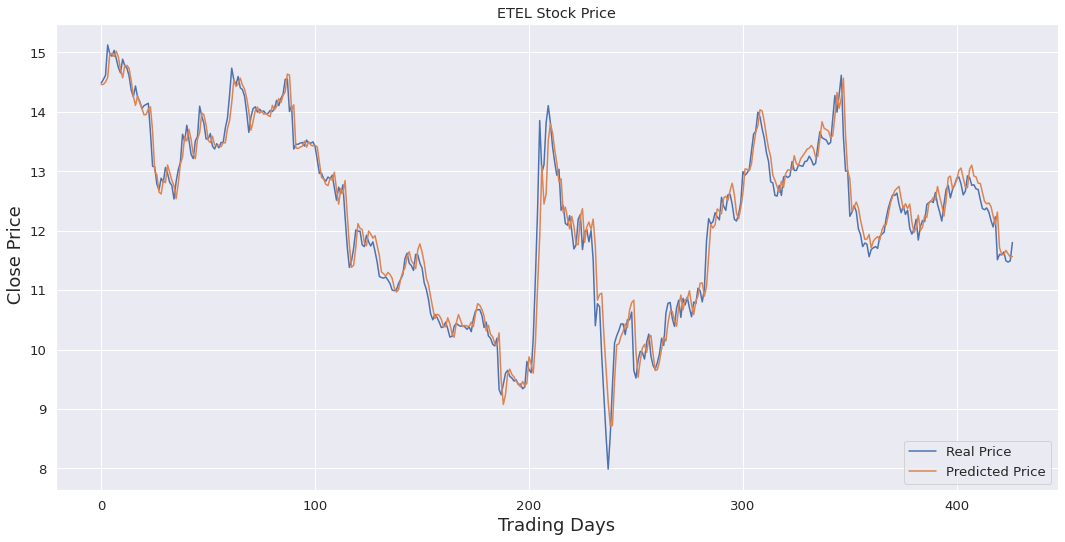

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(testY)
plt.plot(testPredict)
plt.title('ETEL Stock Price')
plt.legend(['Real Price','Predicted Price'], loc='lower right')
plt.xlabel('Trading Days', fontsize=18)
plt.ylabel(' Close Price', fontsize=18)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


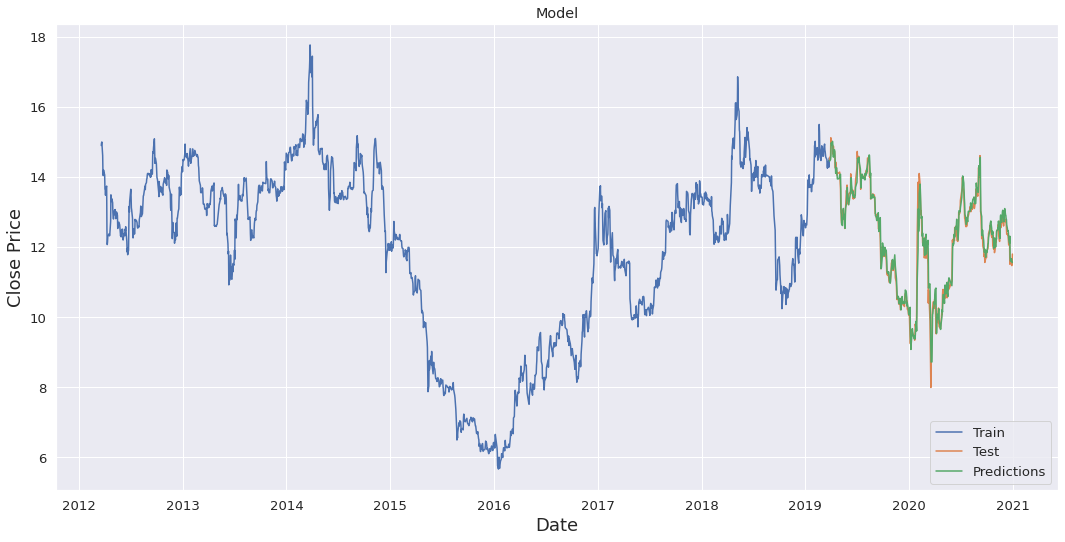

In [ ]:
# Plot the data
train = dataset[:1713]
valid = dataset[1713:]
valid['Predictions'] = testPredict
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()



**Plot Validation curve using data history**


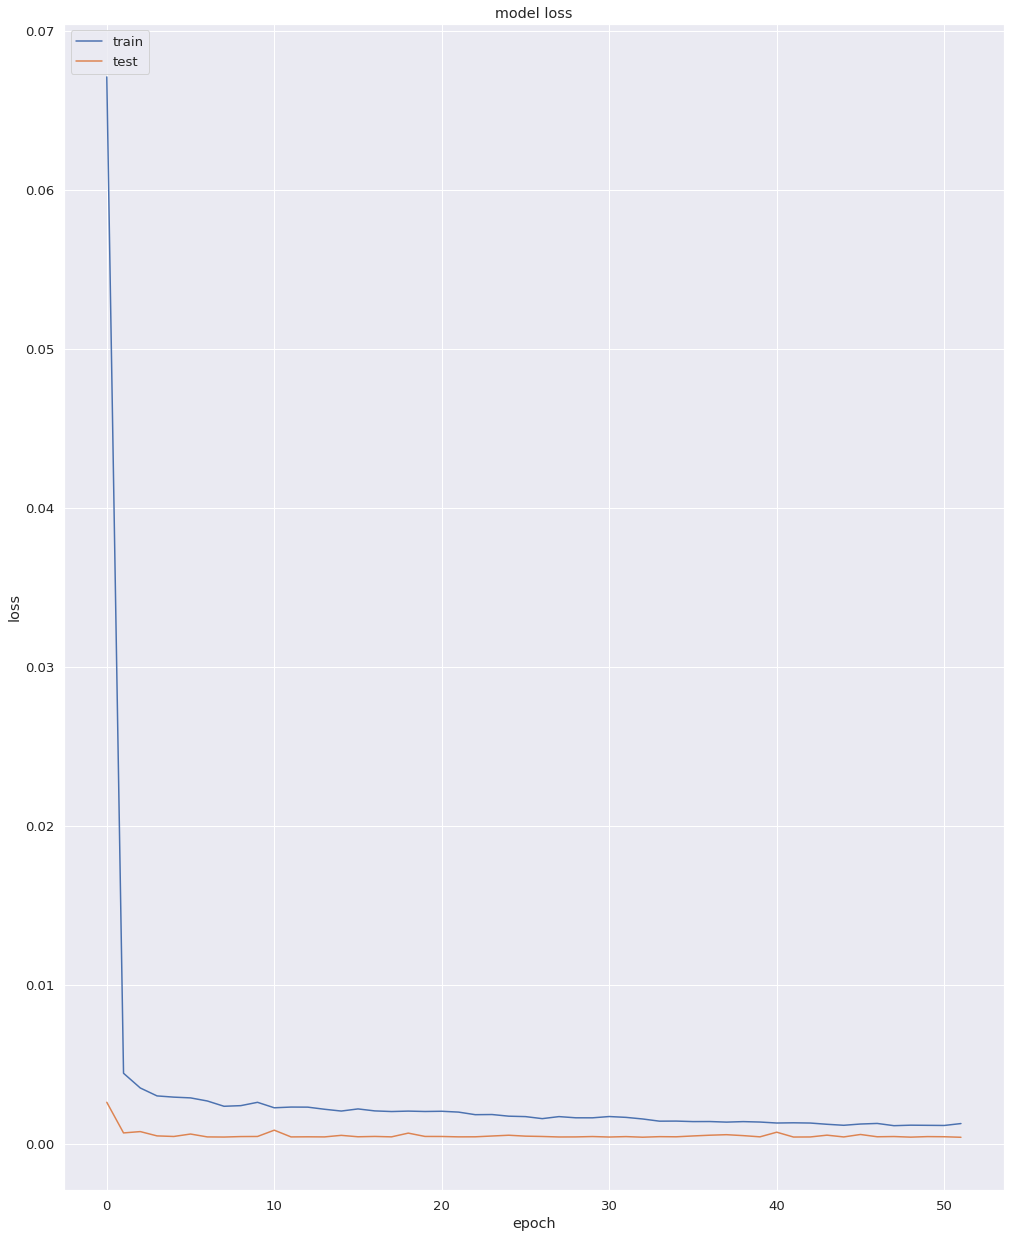

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Make New dataset for stacking

In [ ]:
realY = dataset.iloc[1:1712,0]


In [ ]:
realY=pd.DataFrame(realY)

In [ ]:
realY['P_PRE_TI']=trainPredict

In [ ]:
realY.head()

,Price,P_PRE_TI
datetime,,
2012-03-21,14.97,14.799312
2012-03-22,15.00,14.901171
2012-03-25,14.61,14.936110
2012-03-26,14.11,14.618024
2012-03-27,14.04,14.097439


In [ ]:
realY.tail()

,Price,P_PRE_TI
datetime,,
2019-03-19,14.32,14.467518
2019-03-20,14.25,14.341963
2019-03-21,14.38,14.201173
2019-03-24,14.46,14.337415
2019-03-25,14.28,14.442375


In [ ]:
TESTY=pd.DataFrame(dataset.iloc[1713:,0])

In [ ]:
TESTY['P_test_pre_TI']=testPredict

In [ ]:
TESTY.head()

,Price,P_test_pre_TI
datetime,,
2019-03-27,14.48,14.454505
2019-03-28,14.54,14.456430
2019-03-31,14.61,14.497067
2019-04-01,15.12,14.573146
2019-04-02,14.97,14.973362


In [ ]:
TESTY.tail()

,Price,P_test_pre_TI
datetime,,
2020-12-24,11.64,11.594228
2020-12-27,11.49,11.667475
2020-12-28,11.47,11.607362
2020-12-29,11.49,11.554937
2020-12-30,11.80,11.561555


In [ ]:
realY.to_csv('TRAINY_Tech_ETEL.csv')

In [ ]:
TESTY.to_csv('TESTY_Tech_ETEL.csv')